## Importing Libraries and verify the directory


In [4]:
# Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [5]:
print(os.listdir('C:\\Users\\Prita\\Desktop\\INTRUSION_DETECTION_ SYSTEM'))


['.git', '.ipynb_checkpoints', 'APP.py', 'Cleaned_Data.csv', 'Cleaned_Data_5_Percent.csv', 'dataset', 'main.ipynb', 'README.md', 'test_accuracy_figure.png', 'test_time_figure.png', 'training_accuracy_figure.png', 'train_time_figure.png']


# MODULE 0 : SETTING DATA SET


## Opening kddcup.names : A list of features.


In [6]:

with open("C:\\Users\\Prita\\Desktop\\INTRUSION_DETECTION_ SYSTEM\\dataset\\kddcup.names", 'r') as f:
    print(f.read())


back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

## Appending columns to the dataset and adding a new column name ‘target’ to the dataset.


In [7]:
cols = """duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns = []
for c in cols.split(','):
    if(c.strip()):
        columns.append(c.strip())

columns.append('target')
print(columns)
print(len(columns))


['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
42


## Reading the ‘attack_types’ file.


In [8]:
with open("C:\\Users\\Prita\\Desktop\\INTRUSION_DETECTION_ SYSTEM\\dataset\\training_attack_types", 'r') as f:
    print(f.read())


back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




## Creating a dictionary of attack_types

### Target : Type of attack

| Type of Attack | Meaning                                                                                            |
| -------------- | -------------------------------------------------------------------------------------------------- |
| DOS:           | denial-of-service, e.g. syn flood;                                                                 |
| R2L:           | unauthorized access from a remote machine, e.g. guessing password;                                 |
| U2R:           | unauthorized access to local superuser (root) privileges, e.g., various “buffer overflow” attacks; |
| probing:       | surveillance and another probing, e.g., port scanning                                              |


In [9]:
attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}


In [10]:
path = "C:\\Users\\Prita\\Desktop\\INTRUSION_DETECTION_ SYSTEM\\dataset\\kddcup.data_10_percent.gz"
df = pd.read_csv(path, names=columns)
df.head(20)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

## Reading the dataset(‘kddcup.data_10_percent.gz’) and adding Attack Type feature in the training dataset where attack type feature has 5 distinct values i.e. dos, normal, probe, r2l, u2r.


In [12]:
path = "C:\\Users\\Prita\\Desktop\\INTRUSION_DETECTION_ SYSTEM\\dataset\\kddcup.data_10_percent.gz"
df = pd.read_csv(path, names=columns)
df.head(20)
df.shape
df['Attack Type'] = df.target.apply(lambda r: attacks_types[r[:-1]])
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


## Shape of dataframe and getting data type of each feature


In [13]:
print("shape of our dataset :", df.shape)


shape of our dataset : (494021, 43)


In [14]:
print("No. of Target types :\n", df['target'].value_counts())


No. of Target types :
 target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64


In [15]:
print("No. of Attack Types :\n", df['Attack Type'].value_counts())


No. of Attack Types :
 Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64


In [16]:
df.dtypes


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

# MODULE 1 : DATA PREPROCESSING


## Finding missing values of all features.


In [17]:
df.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#### No missing value found, so we can further proceed to our next step.


## Finding categorical features


In [18]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
# cate_cols.remove('target')
# cate_cols.remove('Attack Type')

cate_cols


['target', 'Attack Type', 'flag', 'protocol_type', 'service']

## Visualizing Categorical Features using bar graph


In [19]:
# Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")


### Protocol_type : type of the protocol, e.g. tcp, udp, etc.


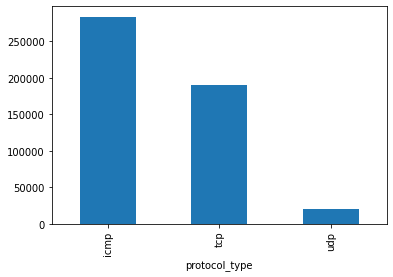

In [20]:
bar_graph('protocol_type')


Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type


### service : network service on the destination, e.g., http, telnet, etc.


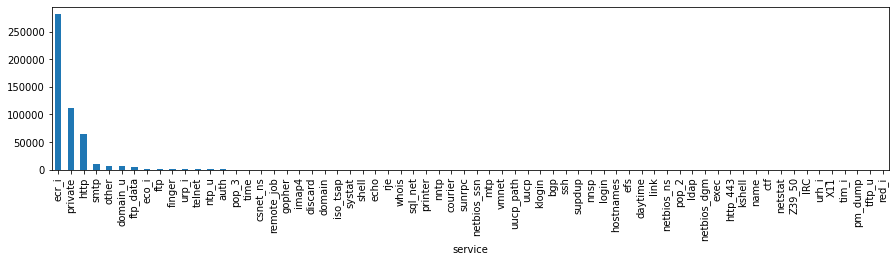

In [21]:
plt.figure(figsize=(15, 3))
bar_graph('service')


### flag : normal or error status of the connection


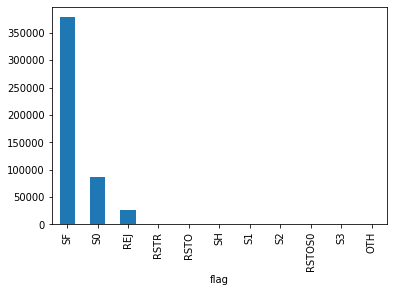

In [22]:
bar_graph('flag')


### logged_in : 1 if successfully logged in; 0 otherwise


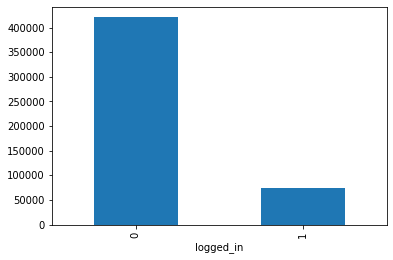

In [23]:
bar_graph('logged_in')


logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.


### Target : targets on which Atack happens


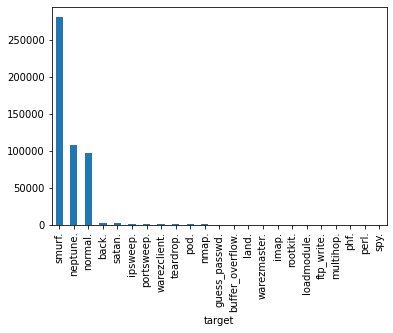

In [24]:
bar_graph('target')


### Attack Type : Type of Attacks

#### (The attack types grouped by attack, it's what we will predict)


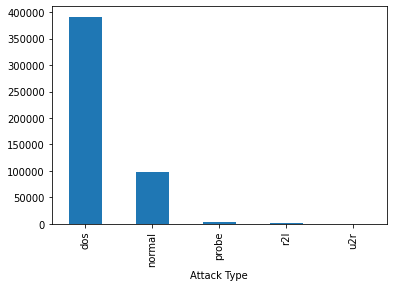

In [25]:
bar_graph('Attack Type')


In [26]:
df.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

### DATA CORRELATION : Find the highly correlated variables using heatmap and ignore them for analysis.


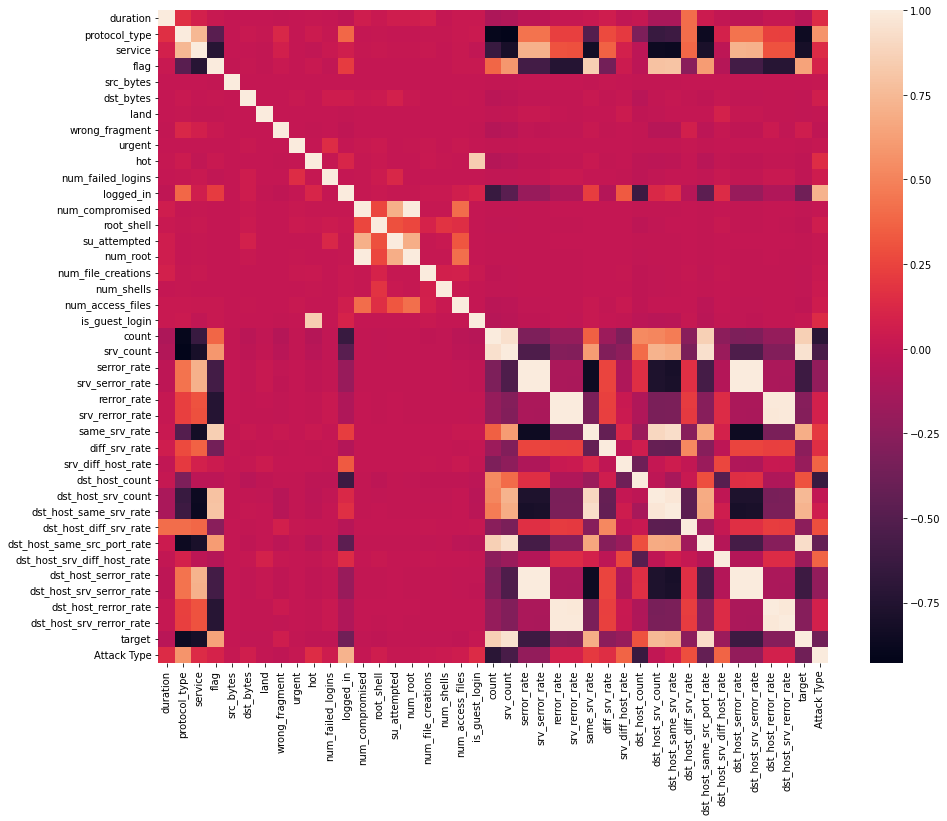

In [27]:

from sklearn.preprocessing import LabelEncoder

# Create a label encoder for the 'protocol' column
encoder = LabelEncoder()

# Encode the 'protocol' column
df['protocol_type'] = encoder.fit_transform(df['protocol_type'])
df['Attack Type'] = encoder.fit_transform(df['Attack Type'])
df['target'] = encoder.fit_transform(df['target'])
df['logged_in'] = encoder.fit_transform(df['logged_in'])
df['flag'] = encoder.fit_transform(df['flag'])
df['service'] = encoder.fit_transform(df['service'])


# Drop columns with missing values
df = df.dropna(axis='columns')

# Keep only columns with more than one unique value
df = df[[col for col in df if df[col].nunique() > 1]]

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize =(15, 12))
sns.heatmap(corr)
plt.show()





In [28]:
df['num_root'].corr(df['num_compromised'])


0.9938277978737942

In [29]:
df['srv_serror_rate'].corr(df['serror_rate'])


0.998361507272552

In [30]:
df['srv_count'].corr(df['count'])


0.9436670688882602

In [31]:
df['srv_rerror_rate'].corr(df['rerror_rate'])


0.9947309539818258

In [32]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])


0.9736854572954081

In [33]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])


0.9981559173372515

In [34]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])


0.9848038371110593

In [35]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])


0.927808034269101

In [36]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])


0.8989546630324231

In [37]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])


0.9449263676783239

In [38]:
df['dst_host_serror_rate'].corr(df['serror_rate'])


0.998672968010501

In [39]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])


0.997835300373953

In [40]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])


0.9978492485679238

In [41]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])


0.9993041091850208

In [42]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])


0.9869947924955924

In [43]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])


0.9821663427308904

In [44]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])


0.9851995540751091

In [45]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])


0.9865705438845588

In [46]:
# This variable is highly correlated with num_compromised and should be ignored for analysis.
# (Correlation = 0.9938277978738366)
df.drop('num_root', axis=1, inplace=True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
# (Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis=1, inplace=True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
# (Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis=1, inplace=True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
# (Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis=1, inplace=True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
# (Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis=1, inplace=True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
# (Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis=1, inplace=True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
# (Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis=1, inplace=True)

# This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
# (Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis=1, inplace=True)


In [47]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,11,1
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,11,1
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,11,1
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,11,1
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,11,1


In [48]:
df.shape


(494021, 33)

In [49]:
df.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [50]:
df_std = df.std()
df_std = df_std.sort_values(ascending=True)
df_std


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
Attack Type                         0.451233
dst_host_same_src_port_rate         0.481309
protocol_type                       0.575606
hot                                 0.782103
num_compro

In [51]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,11,1
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,11,1
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,11,1
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,11,1
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,11,1


#### Remove irrelevant features such as ‘service’ before modelling


In [52]:
df.drop('service', axis=1, inplace=True)


In [53]:
df.shape


(494021, 32)

In [54]:
df.head()


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,9,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,11,1
1,0,1,9,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,11,1
2,0,1,9,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,11,1
3,0,1,9,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,11,1
4,0,1,9,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,11,1


In [55]:
df.dtypes


duration                         int64
protocol_type                    int32
flag                             int32
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [56]:
df.dtypes


duration                         int64
protocol_type                    int32
flag                             int32
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [57]:
df.to_csv('Cleaned_Data.csv', index=False)

In [58]:
import pandas as pd

# Load the original CSV file into a Pandas dataframe
df = pd.read_csv('Cleaned_Data.csv')

# Sample 10% of the data randomly
sampled_df = df.sample(frac=0.05, random_state=42)

# Save the sampled data to a new CSV file
sampled_df.to_csv('Cleaned_Data_5_Percent.csv', index=False)


# MODULE 2 :MODELLING


### Importing libraries and splitting the dataset


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


In [60]:
df = df.drop(['target', ], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type', ], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [61]:
print(X_test)

[[0.   0.   0.9  ... 0.   1.   0.  ]
 [0.   0.   0.9  ... 0.   1.   0.  ]
 [0.   0.   0.9  ... 0.   1.   0.  ]
 ...
 [0.   0.5  0.9  ... 0.   0.   0.  ]
 [0.   0.5  0.5  ... 0.06 0.   0.  ]
 [0.   0.   0.9  ... 0.   1.   0.  ]]


In [62]:
df.head(10)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,9,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.00,1
1,0,1,9,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.00,1
2,0,1,9,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.00,1
3,0,1,9,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.00,1
4,0,1,9,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.00,1
5,0,1,9,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.0,59,59,0.0,0.02,0.00,1
6,0,1,9,212,1940,0,0,0,0,0,...,0.0,1.0,0.0,1.0,1,69,0.0,1.00,0.04,1
7,0,1,9,159,4087,0,0,0,0,0,...,0.0,1.0,0.0,0.0,11,79,0.0,0.09,0.04,1
8,0,1,9,210,151,0,0,0,0,0,...,0.0,1.0,0.0,0.0,8,89,0.0,0.12,0.04,1
9,0,1,9,212,786,0,0,0,1,0,...,0.0,1.0,0.0,0.0,8,99,0.0,0.12,0.05,1


# GAUSSIAN NAIVE BAYES


In [63]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB


In [64]:
model1 = GaussianNB()


In [65]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()


In [66]:
print("Training time: ", end_time-start_time)


Training time:  0.24761676788330078


In [67]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()


In [68]:
print("Testing time: ", end_time-start_time)


Testing time:  0.30294179916381836


In [69]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:", model1.score(X_test, Y_test))


Train score is: 0.8792546088448733
Test score is: 0.878793083354291


# DECISION TREE


In [70]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier


In [71]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=4)


In [72]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()


In [73]:
print("Training time: ", end_time-start_time)


Training time:  0.724851131439209


In [74]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()


In [75]:
print("Testing time: ", end_time-start_time)


Testing time:  0.029194116592407227


In [76]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:", model2.score(X_test, Y_test))


Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


# RANDOM FOREST


In [77]:
from sklearn.ensemble import RandomForestClassifier


In [78]:
model3 = RandomForestClassifier(n_estimators=30)


In [79]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()


In [80]:
print("Training time: ", end_time-start_time)


Training time:  7.227136135101318


In [81]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
print(Y_test_pred3)
end_time = time.time()


[0 0 0 ... 1 0 0]


In [82]:
print("Testing time: ", end_time-start_time)


Testing time:  0.4554779529571533


In [83]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:", model3.score(X_test, Y_test))


Train score is: 0.9999637455663849
Test score is: 0.9996810344298798


# SUPPORT VECTOR MACHINE


In [84]:
from sklearn.svm import SVC


In [85]:
model4 = SVC(gamma='scale')


In [86]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()


In [87]:
print("Training time: ", end_time-start_time)


Training time:  392.73140811920166


In [88]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()


In [89]:
print("Testing time: ", end_time-start_time)


Testing time:  87.09316372871399


In [90]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test, Y_test))


Train score is: 0.9986011831030169
Test score is: 0.9986689321400749


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Evaluate the model on the testing set
y_pred = model4.predict(X_test)
print(y_pred)
print(classification_report(Y_test, y_pred))


[0 0 0 ... 1 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129106
           1       1.00      1.00      1.00     32167
           2       0.99      0.96      0.98      1348
           3       0.88      0.84      0.86       387
           4       0.80      0.63      0.71        19

    accuracy                           1.00    163027
   macro avg       0.93      0.89      0.91    163027
weighted avg       1.00      1.00      1.00    163027



In [95]:
X_test

array([[0.  , 0.  , 0.9 , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.9 , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.9 , ..., 0.  , 1.  , 0.  ],
       ...,
       [0.  , 0.5 , 0.9 , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.5 , 0.5 , ..., 0.06, 0.  , 0.  ],
       [0.  , 0.  , 0.9 , ..., 0.  , 1.  , 0.  ]])

In [99]:
import numpy as np
# Save the y_pred (Prediction) array to a CSV file in a column
np.savetxt("demo.csv", Y_test_pred4.reshape(-1, 1), delimiter=",", fmt='%.3f')

In [97]:
import numpy as np
# Save the y_pred (Prediction) array to a CSV file in a column
# np.savetxt("For_Prediction.csv", X_test.reshape(-1, 1), delimiter=",")
np.savetxt("For_Prediction.csv", X_test, delimiter=",", fmt='%.3f')

In [98]:
import pandas as pd

# Load the original CSV file into a Pandas dataframe
df = pd.read_csv('For_Prediction.csv')

# Sample 10% of the data randomly
sampled_df = df.sample(frac=0.05, random_state=42)

# Save the sampled data to a new CSV file
sampled_df.to_csv('For_Prediction_5_Percent.csv', index=False)


# LOGISTIC REGRESSION


In [89]:
from sklearn.linear_model import LogisticRegression


In [90]:
model5 = LogisticRegression(max_iter=1200000)


In [91]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()


In [92]:
print("Training time: ", end_time-start_time)


Training time:  42.81356930732727


In [93]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()


In [94]:
print("Testing time: ", end_time-start_time)


Testing time:  0.03390836715698242


In [95]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:", model5.score(X_test, Y_test))


Train score is: 0.9935406684109077
Test score is: 0.9935286792985211


# GRADIENT BOOSTING CLASSIFIER


In [96]:
from sklearn.ensemble import GradientBoostingClassifier


In [97]:
model6 = GradientBoostingClassifier(random_state=0)


In [98]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()


In [99]:
print("Training time: ", end_time-start_time)

Training time:  317.1600778102875


In [100]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()


In [101]:
print("Testing time: ", end_time-start_time)


Testing time:  1.4072353839874268


In [102]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test, Y_test))


Train score is: 0.9980241333679765
Test score is: 0.9978163126353303


Artificial Neural Network


In [103]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier


In [104]:
# def fun():
#     model = Sequential()

#     # here 30 is output dimension
#     model.add(Dense(30, input_dim=30, activation='relu',
#               kernel_initializer='random_uniform'))

#     # in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
#     model.add(Dense(1, activation='sigmoid',
#               kernel_initializer='random_uniform'))

#     # 5 classes-normal,dos,probe,r2l,u2r
#     model.add(Dense(5, activation='softmax'))

#     # loss is categorical_crossentropy which specifies that we have multiple classes

#     model.compile(loss='categorical_crossentropy',
#                   optimizer='adam', metrics=['accuracy'])

#     return model


In [105]:
# Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
# This divides our data into batches each of size equal to batch_size.
# Now only this number of samples will be loaded into memory and processed.
# Once we are done with one batch it is flushed from memory and the next batch will be processed.
# model7 = KerasClassifier(build_fn=fun, epochs=100, batch_size=64)


In [106]:
# start = time.time()
# model7.fit(X_train, Y_train.values.ravel())
# end = time.time()


In [107]:
# print('Training time')
# print((end-start))


In [108]:
# start_time = time.time()
# Y_test_pred7 = model7.predict(X_test)
# end_time = time.time()


In [109]:
# print("Testing time: ", end_time-start_time)


In [110]:
# start_time = time.time()
# Y_train_pred7 = model7.predict(X_train)
# end_time = time.time()


In [111]:
# accuracy_score(Y_train, Y_train_pred7)


In [112]:
# accuracy_score(Y_test, Y_test_pred7)


TRAINING ACCURACY


<BarContainer object of 6 artists>

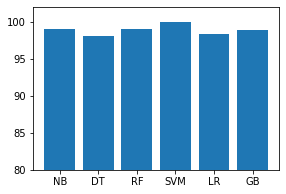

In [113]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB', ]
values = [98.951, 98.058, 98.997, 99.875, 98.352, 98.793]
f = plt.figure(figsize=(15, 3), num=10)
plt.subplot(131)
plt.ylim(80, 102)
plt.bar(names, values)


In [114]:
f.savefig('training_accuracy_figure.png', bbox_inches='tight')


TESTING ACCURACY


<BarContainer object of 6 artists>

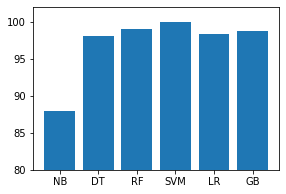

In [115]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [87.903, 98.052, 98.969, 99.879, 98.352, 98.771]
f = plt.figure(figsize=(15, 3), num=10)
plt.subplot(131)
plt.ylim(80, 102)
plt.bar(names, values)


In [116]:
f.savefig('test_accuracy_figure.png', bbox_inches='tight')


TRAINING TIME


<BarContainer object of 6 artists>

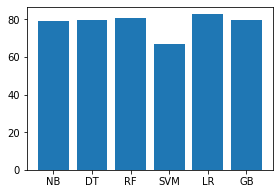

In [117]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [79.04721, 79.50483, 80.45332,
          66.67286, 82.56123, 79.69099]
f = plt.figure(figsize=(15, 3), num=10)
plt.subplot(131)
plt.bar(names, values)


In [118]:
f.savefig('train_time_figure.png', bbox_inches='tight')


TESTING TIME


<BarContainer object of 6 artists>

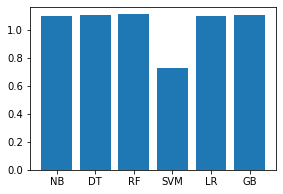

In [119]:
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [1.10089, 1.10471, 1.10961, 0.72654, 1.100198, 1.10416]
f = plt.figure(figsize=(15, 3), num=10)
plt.subplot(131)
plt.bar(names, values)


In [120]:
f.savefig('test_time_figure.png', bbox_inches='tight')


In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Evaluate the model on the testing set
y_pred = model1.predict(X_test)
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.94      0.96    129106
           1       0.97      0.64      0.77     32167
           2       0.09      0.99      0.17      1348
           3       0.32      0.38      0.35       387
           4       0.01      0.74      0.01        19

    accuracy                           0.88    163027
   macro avg       0.47      0.74      0.45    163027
weighted avg       0.97      0.88      0.91    163027



In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, f1_score

y_pred = model2.predict(X_test)
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129106
           1       0.98      0.98      0.98     32167
           2       0.56      0.89      0.68      1348
           3       0.00      0.00      0.00       387
           4       0.00      0.00      0.00        19

    accuracy                           0.99    163027
   macro avg       0.51      0.57      0.53    163027
weighted avg       0.99      0.99      0.99    163027



c:\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Evaluate the model on the testing set
y_pred = model3.predict(X_test)
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129106
           1       1.00      1.00      1.00     32167
           2       0.99      0.99      0.99      1348
           3       0.99      0.96      0.98       387
           4       0.93      0.68      0.79        19

    accuracy                           1.00    163027
   macro avg       0.98      0.93      0.95    163027
weighted avg       1.00      1.00      1.00    163027



In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Evaluate the model on the testing set
y_pred = model4.predict(X_test)
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129106
           1       1.00      1.00      1.00     32167
           2       0.99      0.96      0.98      1348
           3       0.88      0.84      0.86       387
           4       0.80      0.63      0.71        19

    accuracy                           1.00    163027
   macro avg       0.93      0.89      0.91    163027
weighted avg       1.00      1.00      1.00    163027



In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Evaluate the model on the testing set
y_pred = model5.predict(X_test)
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    129106
           1       0.97      1.00      0.98     32167
           2       0.98      0.89      0.94      1348
           3       0.84      0.82      0.83       387
           4       0.86      0.32      0.46        19

    accuracy                           0.99    163027
   macro avg       0.93      0.80      0.84    163027
weighted avg       0.99      0.99      0.99    163027



In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Evaluate the model on the testing set
y_pred = model6.predict(X_test)
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129106
           1       0.99      1.00      1.00     32167
           2       0.98      0.96      0.97      1348
           3       0.93      0.37      0.53       387
           4       0.21      0.58      0.31        19

    accuracy                           1.00    163027
   macro avg       0.82      0.78      0.76    163027
weighted avg       1.00      1.00      1.00    163027



In [129]:
df.to_csv('data.csv', index=False)

In [ ]:

import tkinter as tk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tkinter.font import Font


# Create the main window
window = tk.Tk()
window.title("Intrusion Detection System using SVM")
window.geometry("1000x700")

heading_font = Font(family="Helvetica", size=50, weight="bold") 
heading_font_Small = Font(family="Helvetica", size=16, weight="bold") 

# Create labels and text boxes
lbl_duration = tk.Label(window, text="Duration:")
txt_duration = tk.Entry(window)

lbl_protocol_type = tk.Label(window, text="Protocol:")
txt_protocol_type = tk.Entry(window)

lbl_flag = tk.Label(window, text="Flag:")
txt_flag = tk.Entry(window)

lbl_src_bytes = tk.Label(window, text="Source Bytes:")
txt_src_bytes = tk.Entry(window)

lbl_dst_bytes = tk.Label(window, text="Destination Bytes:")
txt_dst_bytes = tk.Entry(window)

lbl_land = tk.Label(window, text="Land:")
txt_land = tk.Entry(window)

lbl_wrong_fragment = tk.Label(window, text="Wrong Fragement:")
txt_wrong_fragment = tk.Entry(window)

lbl_urgent = tk.Label(window, text="Urgent :")
txt_urgent = tk.Entry(window)

lbl_hot = tk.Label(window, text="Hot :")
txt_hot = tk.Entry(window)

lbl_num_failed_logins = tk.Label(window, text="num_failed_logins :")
txt_num_failed_logins = tk.Entry(window)

lbl_logged_in = tk.Label(window, text="logged_in :")
txt_logged_in = tk.Entry(window)

lbl_num_compromised = tk.Label(window, text="num_compromised :")
txt_num_compromised = tk.Entry(window)

lbl_root_shell = tk.Label(window, text="Root Shell:")
txt_root_shell = tk.Entry(window)

lbl_su_attempted = tk.Label(window, text="Su Attempted:")
txt_su_attempted = tk.Entry(window)

lbl_num_file_creations = tk.Label(window, text="File Creation Number:")
txt_num_file_creations = tk.Entry(window)

lbl_num_shells = tk.Label(window, text="Shell Number:")
txt_num_shells = tk.Entry(window)

lbl_num_access_files = tk.Label(window, text="Access File Number:")
txt_num_access_files = tk.Entry(window)

lbl_is_guest_login = tk.Label(window, text="Guest login? :")
txt_is_guest_login = tk.Entry(window)

lbl_count = tk.Label(window, text="Count :")
txt_count = tk.Entry(window)

lbl_srv_count = tk.Label(window, text="Server Count :")
txt_srv_count = tk.Entry(window)

lbl_serror_rate = tk.Label(window, text="Server_Error Rate : ")
txt_serror_rate = tk.Entry(window)

lbl_rerror_rate = tk.Label(window, text="Error Rate : ")
txt_rerror_rate = tk.Entry(window)

lbl_same_srv_rate = tk.Label(window, text="Same Srv Rate : ")
txt_same_srv_rate = tk.Entry(window)

lbl_diff_srv_rate = tk.Label(window, text="Diff Srv Rate : ")
txt_diff_srv_rate = tk.Entry(window)

lbl_srv_diff_host_rate = tk.Label(window, text="Diff Srv Host Rate : ")
txt_srv_diff_host_rate = tk.Entry(window)

lbl_dst_host_count = tk.Label(window, text="Destination Host Count : ")
txt_dst_host_count = tk.Entry(window)

lbl_dst_host_srv_count = tk.Label(window, text="Dest Host Srv Count : ")
txt_dst_host_srv_count = tk.Entry(window)

lbl_dst_host_diff_srv_rate = tk.Label(window, text="Dest Host Diff Srv : ")
txt_dst_host_diff_srv_rate = tk.Entry(window)

lbl_dst_host_same_src_port_rate = tk.Label(window, text="Dest Host Same Srv Port Rate : ")
txt_dst_host_same_src_port_rate = tk.Entry(window)

lbl_dst_host_srv_diff_host_rate = tk.Label(window, text="Dest Host Srv Diff Host Rate : ")
txt_dst_host_srv_diff_host_rate = tk.Entry(window)

# Arranging Fields and Labels
lbl_duration.grid(row=0, column=0, padx=15, pady=15)
txt_duration.grid(row=0, column=1, padx=15, pady=15)

lbl_protocol_type.grid(row=1, column=0, padx=15, pady=15)
txt_protocol_type.grid(row=1, column=1, padx=15, pady=15)

lbl_flag.grid(row=2, column=0, padx=15, pady=15)
txt_flag.grid(row=2, column=1, padx=15, pady=15)

lbl_src_bytes.grid(row=3, column=0, padx=15, pady=15)
txt_src_bytes.grid(row=3, column=1, padx=15, pady=15)

lbl_dst_bytes.grid(row=4, column=0, padx=15, pady=15)
txt_dst_bytes.grid(row=4, column=1, padx=15, pady=15)

lbl_land.grid(row=5, column=0, padx=15, pady=15)
txt_land.grid(row=5, column=1, padx=15, pady=15)

lbl_wrong_fragment.grid(row=6, column=0, padx=15, pady=15)
txt_wrong_fragment.grid(row=6, column=1, padx=15, pady=15)

lbl_urgent.grid(row=7, column=0, padx=15, pady=15)
txt_urgent.grid(row=7, column=1, padx=15, pady=15)

lbl_hot.grid(row=8, column=0, padx=15, pady=15)
txt_hot.grid(row=8, column=1, padx=15, pady=15)

lbl_num_failed_logins.grid(row=9, column=0, padx=15, pady=15)
txt_num_failed_logins.grid(row=9, column=1, padx=15, pady=15)



lbl_logged_in.grid(row=0, column=2, padx=15, pady=15)
txt_logged_in.grid(row=0, column=3, padx=15, pady=15)

lbl_num_compromised.grid(row=1, column=2, padx=15, pady=15)
txt_num_compromised.grid(row=1, column=3, padx=15, pady=15)

lbl_root_shell.grid(row=2, column=2, padx=15, pady=15)
txt_root_shell.grid(row=2, column=3, padx=15, pady=15)

lbl_su_attempted.grid(row=3, column=2, padx=15, pady=15)
txt_su_attempted.grid(row=3, column=3, padx=15, pady=15)

lbl_num_file_creations.grid(row=4, column=2, padx=15, pady=15)
txt_num_file_creations.grid(row=4, column=3, padx=15, pady=15)

lbl_num_shells.grid(row=5, column=2, padx=15, pady=15)
txt_num_shells.grid(row=5, column=3, padx=15, pady=15)

lbl_num_access_files.grid(row=6, column=2, padx=15, pady=15)
txt_num_access_files.grid(row=6, column=3, padx=15, pady=15)

lbl_is_guest_login.grid(row=7, column=2, padx=15, pady=15)
txt_is_guest_login.grid(row=7, column=3, padx=15, pady=15)

lbl_count.grid(row=8, column=2, padx=15, pady=15)
txt_count.grid(row=8, column=3, padx=15, pady=15)

lbl_srv_count.grid(row=9, column=2, padx=15, pady=15)
txt_srv_count.grid(row=9, column=3, padx=15, pady=15)



lbl_serror_rate.grid(row=0, column=4, padx=15, pady=15)
txt_serror_rate.grid(row=0, column=5, padx=15, pady=15)

lbl_rerror_rate.grid(row=1, column=4, padx=15, pady=15)
txt_rerror_rate.grid(row=1, column=5, padx=15, pady=15)

lbl_same_srv_rate.grid(row=2, column=4, padx=15, pady=15)
txt_same_srv_rate.grid(row=2, column=5, padx=15, pady=15)

lbl_diff_srv_rate.grid(row=3, column=4, padx=15, pady=15)
txt_diff_srv_rate.grid(row=3, column=5, padx=15, pady=15)

lbl_srv_diff_host_rate.grid(row=4, column=4, padx=15, pady=15)
txt_srv_diff_host_rate.grid(row=4, column=5, padx=15, pady=15)

lbl_dst_host_count.grid(row=5, column=4, padx=15, pady=15)
txt_dst_host_count.grid(row=5, column=5, padx=15, pady=15)

lbl_dst_host_srv_count.grid(row=6, column=4, padx=15, pady=15)
txt_dst_host_srv_count.grid(row=6, column=5, padx=15, pady=15)

lbl_dst_host_diff_srv_rate.grid(row=7, column=4, padx=15, pady=15)
txt_dst_host_diff_srv_rate.grid(row=7, column=5, padx=15, pady=15)

lbl_dst_host_same_src_port_rate.grid(row=8, column=4, padx=15, pady=15)
txt_dst_host_same_src_port_rate.grid(row=8, column=5, padx=15, pady=15)

lbl_dst_host_srv_diff_host_rate.grid(row=9, column=4, padx=15, pady=15)
txt_dst_host_srv_diff_host_rate.grid(row=9, column=5, padx=15, pady=15)


# Create a label to show the prediction
lbl_result = tk.Label(window, text="")
lbl_result.grid(row=11, column=3)


# Create a function to predict intrusion
def predict_intrusion():
    duration = float(txt_duration.get())
    protocol_type = float(txt_protocol_type.get())
    flag = float(txt_flag.get())
    src_bytes = float(txt_src_bytes.get())
    dst_bytes = float(txt_dst_bytes.get())
    land = float(txt_land.get())
    wrong_fragment = float(txt_wrong_fragment.get())
    urgent = float(txt_urgent.get())
    hot = float(txt_hot.get())
    num_failed_logins = float(txt_num_failed_logins.get())
    logged_in = float(txt_logged_in.get())
    num_compromised = float(txt_num_compromised.get())
    root_shell = float(txt_root_shell.get())
    su_attempted = float(txt_su_attempted.get())
    num_file_creations = float(txt_num_file_creations.get())
    num_shells = float(txt_num_shells.get())
    num_access_files = float(txt_num_access_files.get())
    is_guest_login = float(txt_is_guest_login.get())
    count = float(txt_count.get())
    srv_count = float(txt_srv_count.get())
    serror_rate = float(txt_serror_rate.get())
    rerror_rate = float(txt_rerror_rate.get())
    same_srv_rate = float(txt_same_srv_rate.get())
    diff_srv_rate = float(txt_diff_srv_rate.get())
    srv_diff_host_rate = float(txt_srv_diff_host_rate.get())
    dst_host_count = float(txt_dst_host_count.get())
    dst_host_srv_count = float(txt_dst_host_srv_count.get())
    dst_host_diff_srv_rate = float(txt_dst_host_diff_srv_rate.get())
    dst_host_same_src_port_rate = float(txt_dst_host_same_src_port_rate.get())
    dst_host_srv_diff_host_rate = float(txt_dst_host_srv_diff_host_rate.get())

    data = [[duration, protocol_type, flag, src_bytes, dst_bytes, land,
             wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_file_creations,
             num_shells, num_access_files, is_guest_login, count, srv_count, serror_rate, rerror_rate, same_srv_rate, diff_srv_rate,
             srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate]]
    

    # create a new window
    message_window = tk.Toplevel(window)
    message_window.title("Detecting.....")
    message_window.geometry("1000x700")
    
    # create a label with the message text
    message_label = tk.Label(message_window, text="Detecting Intrusion...", font=heading_font)
    message_label.pack(expand=True, anchor='center')

    
    # schedule the window to close after 3 seconds
    message_window.after(3000, message_window.destroy) 
        
    prediction = model4.predict(data)
    print(prediction)
    if prediction[0] == 0:
        lbl_result.config(text="No intrusion detected.",font=heading_font_Small)
    else:
        lbl_result.config(text="Intrusion detected!",font=heading_font_Small)


# Create a button to predict intrusion
btn_predict = tk.Button(window, text="Predict", command=predict_intrusion, width=10)
btn_predict.grid(row=10, column =3)


# Start the main event loop
window.mainloop()


In [130]:
print(X_test)

[[0.   0.   0.9  ... 0.   1.   0.  ]
 [0.   0.   0.9  ... 0.   1.   0.  ]
 [0.   0.   0.9  ... 0.   1.   0.  ]
 ...
 [0.   0.5  0.9  ... 0.   0.   0.  ]
 [0.   0.5  0.5  ... 0.06 0.   0.  ]
 [0.   0.   0.9  ... 0.   1.   0.  ]]


In [131]:
import csv


# CSV file name
filename = 'X_test.csv'

# Writing the data to CSV file
with open(filename, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for row in X_test :
        csvwriter.writerow(row)

print(f'{filename} file created successfully.')


X_test.csv file created successfully.
